# Fine-tuning with Dreambooth

Made to use on colab's GPU

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%ls

drive/  sample_data/


In [3]:
!git clone https://github.com/huggingface/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 57305, done.
remote: Counting objects: 100% (16921/16921), done.
remote: Compressing objects: 100% (1186/1186), done.
remote: Total 57305 (delta 16451), reused 15773 (delta 15712), pack-reused 40384
Receiving objects: 100% (57305/57305), 38.28 MiB | 24.27 MiB/s, done.
Resolving deltas: 100% (41738/41738), done.


In [4]:
%cd diffusers
!pip install .
%cd examples/dreambooth
!pip install -r requirements.txt
!accelerate config default

/content/diffusers
Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.27.0.dev0-py3-none-any.whl size=1984359 sha256=46be7f907b8776cd7890e573d5433167c86263b3836690074a73b4eaedeece37
  Stored in directory: /tmp/pip-ephem-wheel-cache-_6pntjor/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
/content/diffusers/examples/dreambooth
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 10.7 MB/s eta 0:00:00
accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [5]:
# Links to go from dreambooth to drive from here to save the results
db_to_drive_path = './../../../drive/MyDrive/SketchToReality/'
drive_to_db_path = './../../../../diffusers/examples/dreambooth' # In case, to come back :)

In [6]:
%ls

README.md              requirements.txt             train_dreambooth_flax.py
README_sdxl.md         test_dreambooth_lora_edm.py  train_dreambooth_lora.py
requirements_flax.txt  test_dreambooth_lora.py      train_dreambooth_lora_sdxl.py
requirements_sdxl.txt  test_dreambooth.py           train_dreambooth.py


__________________________
**VERY IMPORTANT**

1. Colab doesn't support the standard commands on regular terminals.
To avoid errors when running dreambooth with the command line in the huggingface tutorial, change `train_dreambooth.py`at the 3rd line before the end:

- Delete the `if __name__ == 'main':`
- Unindent the lines below
At the end of the file, you should have
```
args=parseargs()
main(args)
```
2. Don't forget to go on the 8Gb GPU version on the huggingface tutorial, as 16Gb won't be supported on colab.

3. Make sure your data and results paths are valid and that the folders do not already contain data

______________________________

In [7]:
!pip install -q diffusers transformers accelerate peft # Trick found online to make it work
!pip install xformers
!pip install bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.2/218.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
# Show possible parameters to pass
!accelerate launch train_dreambooth.py --help

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2024-03-08 22:18:47.540100: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 22:18:47.540182: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 22:18:47.542260: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:

In [ ]:
!accelerate launch train_dreambooth.py \
 --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
 --instance_data_dir="./../../../drive/MyDrive/SketchToReality/dreambooth_cat" \
 --instance_prompt="a photo of a sks cat" \
 --output_dir "./../../../drive/MyDrive/SketchToReality/dreambooth_cat_results" \
 --use_8bit_adam \
 --gradient_checkpointing \
 --enable_xformers_memory_efficient_attention \
 --set_grads_to_none \
 --train_batch_size=2 \
 --gradient_accumulation_steps=1 \
 --learning_rate=5e-6 \
 --lr_scheduler="constant" \
 --lr_warmup_steps=0 \
 --max_train_steps=400

# These parameters bring an error - I don't know why
  # --num_train_epochs= 5 \
  # --checkpointing_steps= 3 \

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2024-03-08 22:28:31.848059: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 22:28:31.848125: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 22:28:31.849998: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:

# Inference

In [11]:
from PIL import Image
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [9]:
%ls

README.md              requirements.txt             train_dreambooth_flax.py
README_sdxl.md         test_dreambooth_lora_edm.py  train_dreambooth_lora.py
requirements_flax.txt  test_dreambooth_lora.py      train_dreambooth_lora_sdxl.py
requirements_sdxl.txt  test_dreambooth.py           train_dreambooth.py


In [10]:
from torch import autocast
from diffusers import StableDiffusionPipeline
import torch

model_id = "./../../../drive/MyDrive/SketchToReality/dreambooth_cat_results" #@param {type:"string"}
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

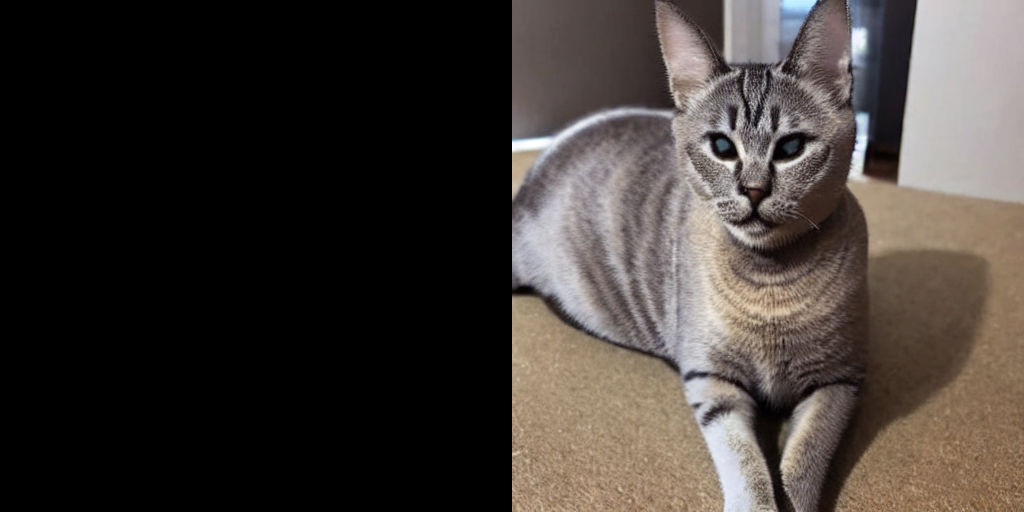

In [12]:
from torch import autocast
prompt = "a photo of sks cat" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}

all_images = []
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

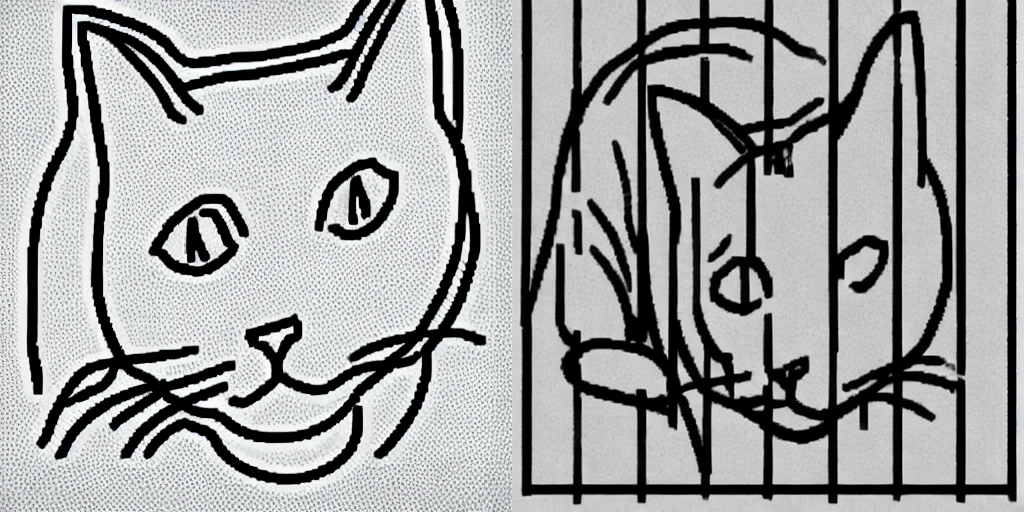

In [13]:
from torch import autocast
prompt = "a photo of a cat in the style of sks" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}

all_images = []
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

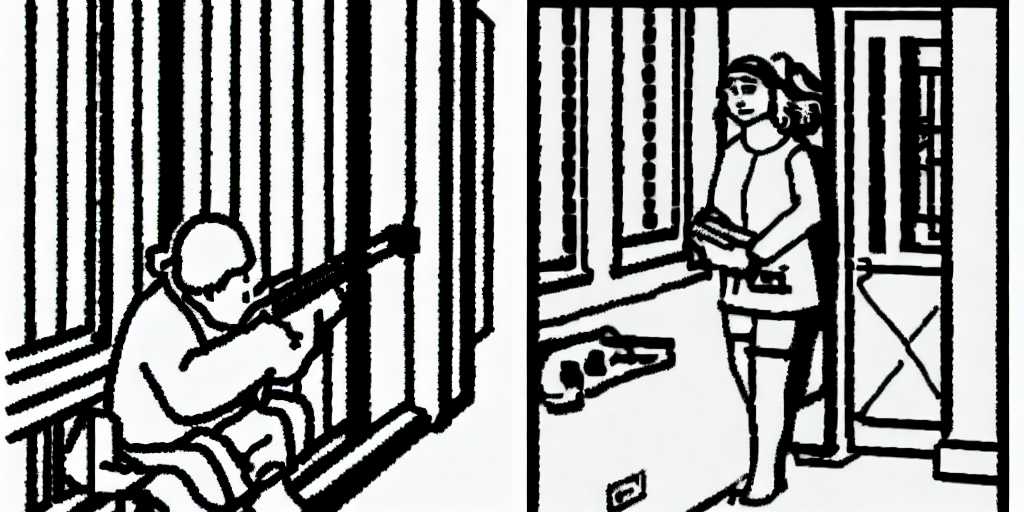

In [14]:
from torch import autocast
prompt = "a photo in the style of sks" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}

all_images = []
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

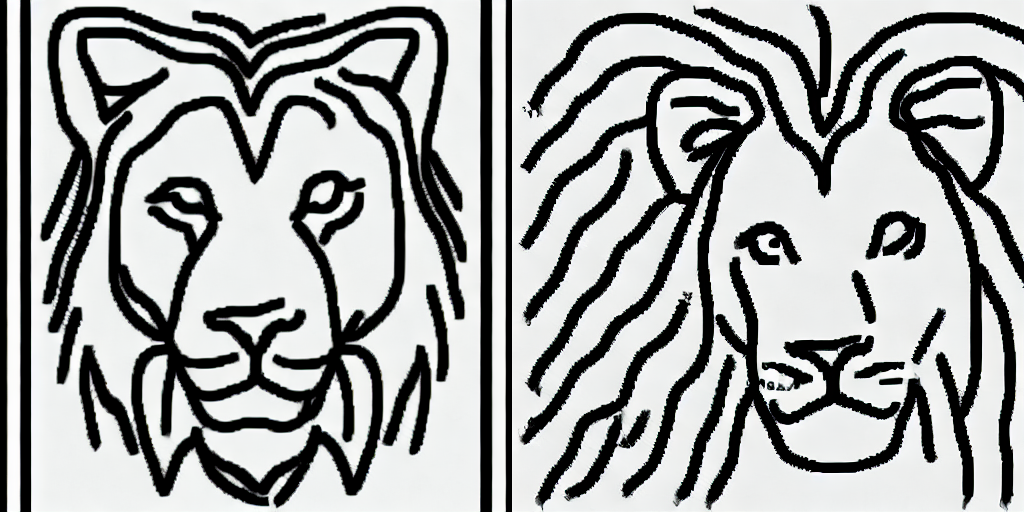

In [15]:
from torch import autocast
prompt = "a photo of a lion in the style of sks" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}

all_images = []
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

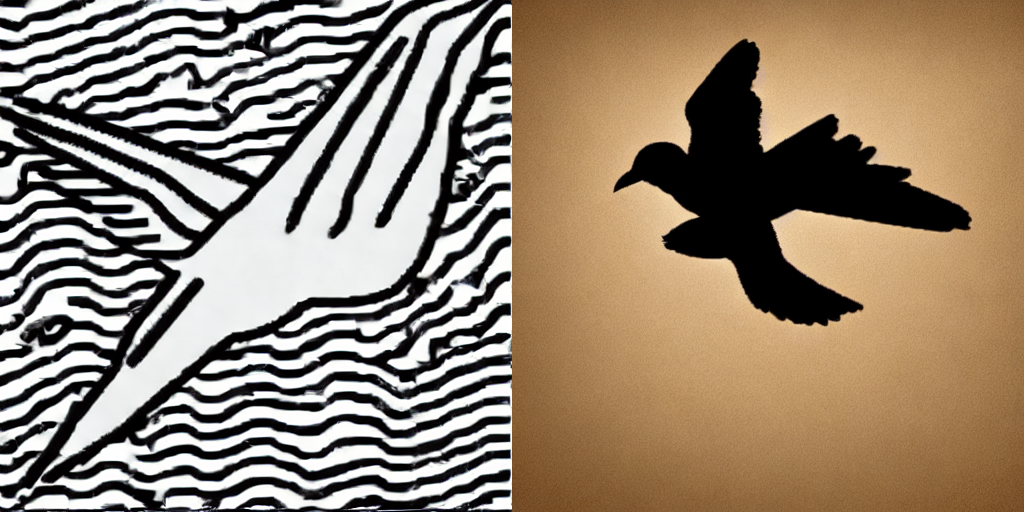

In [16]:
from torch import autocast
prompt = "a photo of a bird flying over the sea in the style of sks" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}

all_images = []
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

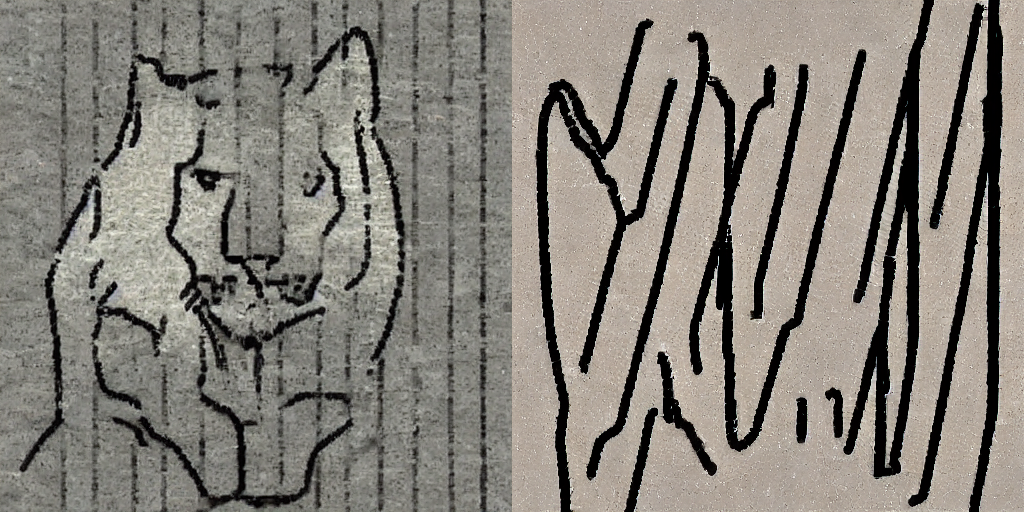

In [17]:
from torch import autocast
prompt = "sks" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}

all_images = []
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid